In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

In [ ]:
loans = pd.read_csv('../resources/data/bank-full.csv')

In [ ]:
loans.head()

In [511]:
loans.shape

(45211, 17)

In [512]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [513]:
loans.rename(columns={'day': 'day_of_week'}, inplace=True)

# List of columns to drop
columns_to_drop = ["default", "balance", "previous", "poutcome", "Target"]

# Drop the specified columns
loans = loans.drop(columns = columns_to_drop)

# Display the updated DataFrame
print(loans.head())

   age           job  marital  education housing loan  contact  day_of_week  \
0   58    management  married   tertiary     yes   no  unknown            5   
1   44    technician   single  secondary     yes   no  unknown            5   
2   33  entrepreneur  married  secondary     yes  yes  unknown            5   
3   47   blue-collar  married    unknown     yes   no  unknown            5   
4   33       unknown   single    unknown      no   no  unknown            5   

  month  duration  campaign  pdays  
0   may       261         1     -1  
1   may       151         1     -1  
2   may        76         1     -1  
3   may        92         1     -1  
4   may       198         1     -1  


In [514]:
loans.isnull().sum()

age            0
job            0
marital        0
education      0
housing        0
loan           0
contact        0
day_of_week    0
month          0
duration       0
campaign       0
pdays          0
dtype: int64

In [515]:
loans.describe()

,age,day_of_week,duration,campaign,pdays
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841,40.197828
std,10.618762,8.322476,257.527812,3.098021,100.128746
min,18.000000,1.000000,0.000000,1.000000,-1.000000
25%,33.000000,8.000000,103.000000,1.000000,-1.000000
50%,39.000000,16.000000,180.000000,2.000000,-1.000000
75%,48.000000,21.000000,319.000000,3.000000,-1.000000
max,95.000000,31.000000,4918.000000,63.000000,871.000000


<Axes: >

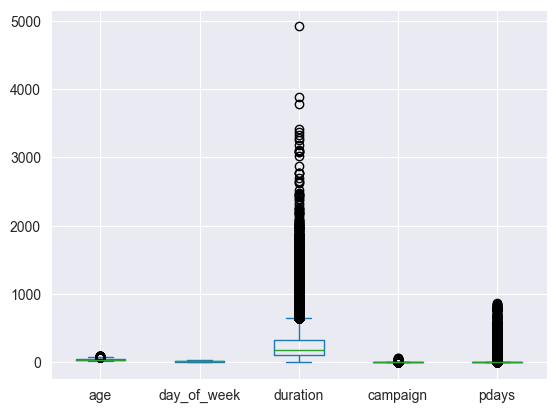

In [516]:
loans.plot.box()

In [517]:
Q1_age = loans['age'].quantile(0.25)
Q3_age = loans['age'].quantile(0.75)
IQR = Q3_age - Q1_age

# Define the lower and upper bounds for potential outliers
lower_bound = Q1_age - 1.5 * IQR
upper_bound = Q3_age + 1.5 * IQR

# Create a mask to identify rows with valid 'age' values
mask_age = (loans['age'] >= lower_bound) & (loans['age'] <= upper_bound)

# Apply the mask to the entire DataFrame
loans = loans[mask_age]

# Display the shape of the updated DataFrame
print("After filtering:", loans.shape)

After filtering: (44724, 12)


In [518]:
Q1_duration = loans['duration'].quantile(0.25)
Q3_duration = loans['duration'].quantile(0.75)
IQR_duration = Q3_duration - Q1_duration

# Define the lower and upper bounds for potential outliers
lower_bound_duration = Q1_duration - 1.5 * IQR_duration
upper_bound_duration = Q3_duration + 1.5 * IQR_duration

# Create a mask to identify rows with valid 'duration' values
mask_duration = (loans['duration'] >= lower_bound_duration) & (loans['duration'] <= upper_bound_duration)

# Apply the mask to the entire DataFrame
loans = loans[mask_duration]

# Display the shape of the updated DataFrame
print("After filtering duration:", loans.shape)

After filtering duration: (41507, 12)


In [519]:
Q1_pdays = loans['pdays'].quantile(0.25)
Q3_pdays = loans['pdays'].quantile(0.75)
IQR_pdays = Q3_pdays - Q1_pdays

# Define the lower and upper bounds for potential outliers
lower_bound_pdays = Q1_pdays - 1.5 * IQR_pdays
upper_bound_pdays = Q3_pdays + 1.5 * IQR_pdays

# Create a mask to identify rows with valid 'pdays' values
mask_pdays = (loans['pdays'] >= lower_bound_pdays) & (loans['pdays'] <= upper_bound_pdays)

# Apply the mask to the entire DataFrame
loans = loans[mask_pdays]

# Display the shape of the updated DataFrame
print("After filtering pdays:", loans.shape)

After filtering pdays: (33935, 12)


# Les box plots permettent de représenter graphiquement le résultat de .describe()

<Axes: >

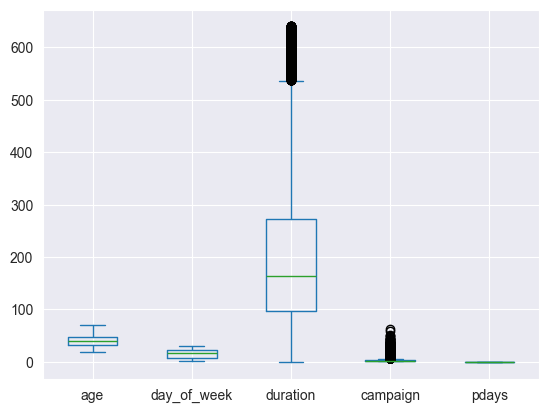

In [520]:
loans.plot.box()

<Axes: >

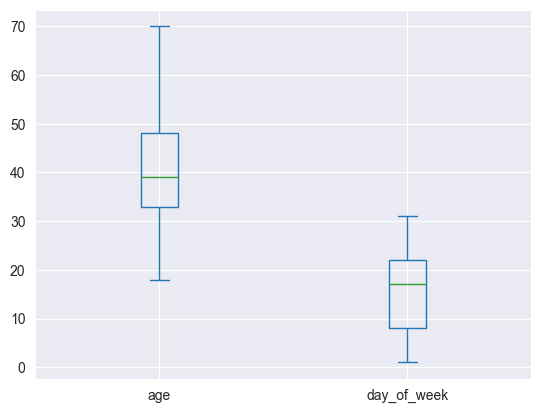

In [521]:
loans[["age", "day_of_week"]].plot.box()

In [522]:
import plotly.express as px

In [523]:
dtemp = loans.copy()
px.histogram(data_frame=dtemp, x="age", color="loan")

In [524]:
loans.dtypes

age             int64
job            object
marital        object
education      object
housing        object
loan           object
contact        object
day_of_week     int64
month          object
duration        int64
campaign        int64
pdays           int64
dtype: object

In [525]:
from category_encoders import OrdinalEncoder

In [526]:
categorical_features = [col for col in loans.columns if loans[col].dtype == 'object']
encoder = OrdinalEncoder(cols=categorical_features).fit(loans)
new_loans=encoder.transform(loans)
new_loans

,age,job,marital,education,housing,loan,contact,day_of_week,month,duration,campaign,pdays
0,58,1,1,1,1,1,1,5,1,261,1,-1
1,44,2,2,2,1,1,1,5,1,151,1,-1
2,33,3,1,2,1,2,1,5,1,76,1,-1
3,47,4,1,3,1,1,1,5,1,92,1,-1
4,33,5,2,3,2,1,1,5,1,198,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,1,1,1,2,1,2,16,6,333,2,-1
45202,34,7,2,2,2,1,2,17,6,224,1,-1
45203,23,12,2,1,2,1,2,17,6,266,1,-1
45205,25,2,2,2,2,2,2,17,6,386,2,-1


In [527]:
# nombre distinc de prêts acceptés
loans["loan"].value_counts().head()

loan
no     28242
yes     5693
Name: count, dtype: int64

In [528]:
loans = loans.drop_duplicates()

In [529]:
loans.head(2)

,age,job,marital,education,housing,loan,contact,day_of_week,month,duration,campaign,pdays
0,58,management,married,tertiary,yes,no,unknown,5,may,261,1,-1
1,44,technician,single,secondary,yes,no,unknown,5,may,151,1,-1


In [530]:
# Replace "unknown" and "unemployed" with "others"
loans['job'] = loans['job'].replace(['unknown', 'unemployed'], 'others')

C:\Users\marik\AppData\Local\Temp\ipykernel_16272\692268788.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 0, 'JOB')

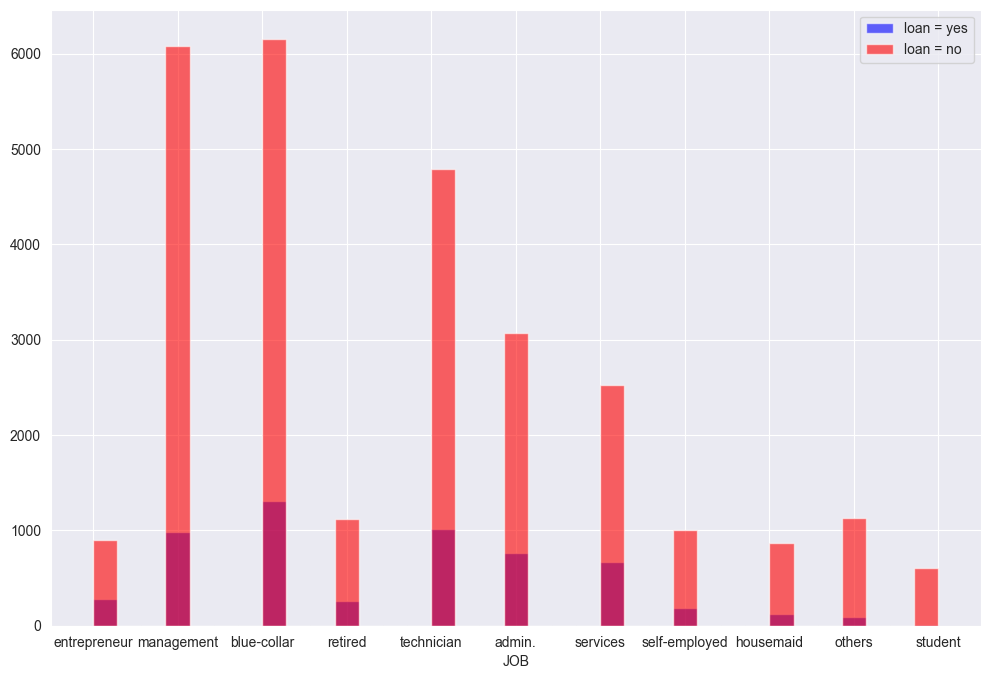

In [531]:
# Performing Exploratory Data Analysis (EDA)
plt.figure(figsize=(12,8))

loans[loans['loan']=='yes']['job'].hist(bins=35, color='blue', label='loan = yes', alpha=0.6)

loans[loans['loan']=='no']['job'].hist(bins=35, color='red', label='loan = no', alpha=0.6)

plt.legend()
plt.xlabel('JOB')

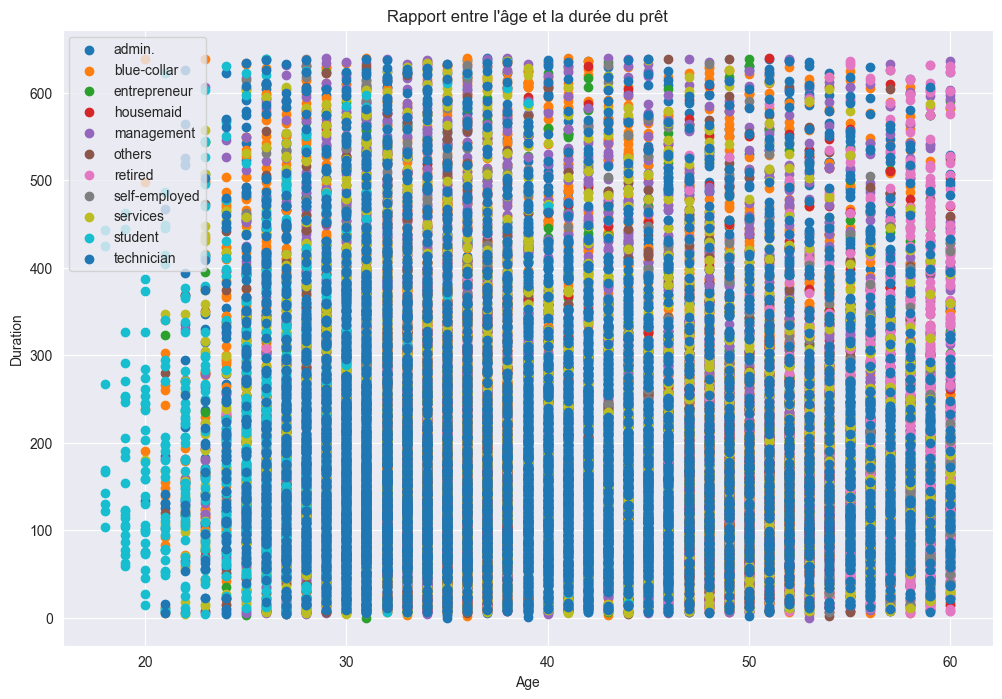

In [532]:
filtered_data = loans[loans['age'] <= 60]

# Create a scatter plot
plt.figure(figsize=(12, 8))
for job, group in filtered_data.groupby('job'):
    plt.scatter(group['age'], group['duration'], label=job)

plt.xlabel('Age')
plt.ylabel('Duration')
plt.title('Rapport entre l\'âge et la durée du prêt')
plt.legend()
plt.show()

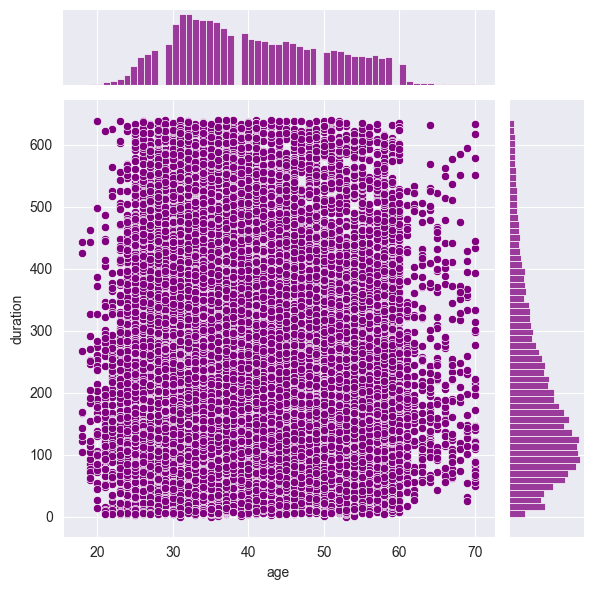

In [533]:
sns.jointplot(x='age',y='duration',data=loans,color='purple')

In [534]:
cat_feats_job = ['job']
cat_feats_marital = ['marital']
cat_feats_education = ['education']
cat_feats_housing = ['housing']
cat_feats_contact = ['contact']
cat_feats_month = ['month']

In [535]:
final_data = pd.get_dummies(loans, columns=cat_feats_job + cat_feats_marital + cat_feats_education + cat_feats_housing + cat_feats_contact + cat_feats_month, drop_first=True)

In [536]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33931 entries, 0 to 45209
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  33931 non-null  int64 
 1   loan                 33931 non-null  object
 2   day_of_week          33931 non-null  int64 
 3   duration             33931 non-null  int64 
 4   campaign             33931 non-null  int64 
 5   pdays                33931 non-null  int64 
 6   job_blue-collar      33931 non-null  bool  
 7   job_entrepreneur     33931 non-null  bool  
 8   job_housemaid        33931 non-null  bool  
 9   job_management       33931 non-null  bool  
 10  job_others           33931 non-null  bool  
 11  job_retired          33931 non-null  bool  
 12  job_self-employed    33931 non-null  bool  
 13  job_services         33931 non-null  bool  
 14  job_student          33931 non-null  bool  
 15  job_technician       33931 non-null  bool  
 16  marital_m

In [537]:
from sklearn.model_selection import train_test_split

In [538]:
# Split data into training and testing set
X = final_data.drop('loan',axis=1)
y = final_data['loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [539]:
from sklearn.tree import DecisionTreeClassifier

In [540]:
dtree = DecisionTreeClassifier()

In [541]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [542]:
predictions = dtree.predict(X_test)

In [543]:
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score {:.2f}%".format(accuracy * 100))

Accuracy Score 72.87%


In [544]:
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_train)

accuracy = accuracy_score(y_train, y_pred)
print("Accuracy Score {:.2f}%".format(accuracy * 100))

Accuracy Score 100.00%


In [545]:
from sklearn.metrics import classification_report,confusion_matrix

In [546]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          no       0.85      0.82      0.83      8493
         yes       0.22      0.26      0.24      1687

    accuracy                           0.73     10180
   macro avg       0.54      0.54      0.54     10180
weighted avg       0.74      0.73      0.74     10180


In [547]:
print(confusion_matrix(y_test,predictions))

[[6984 1509]
 [1253  434]]


In [548]:
from sklearn.ensemble import RandomForestClassifier

In [549]:
rfc = RandomForestClassifier(n_estimators=100)

In [550]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [551]:
predictions = rfc.predict(X_test)

In [552]:
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: {:.2f}%".format(accuracy * 100))

Accuracy Score: 82.85%


In [553]:
y_pred = rfc.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy Score: {:.2f}%".format(accuracy * 100))

Accuracy Score: 100.00%


In [554]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          no       0.84      0.98      0.90      8493
         yes       0.41      0.08      0.14      1687

    accuracy                           0.83     10180
   macro avg       0.63      0.53      0.52     10180
weighted avg       0.77      0.83      0.78     10180


In [555]:
print(confusion_matrix(y_test,predictions))

[[8294  199]
 [1547  140]]


In [556]:
pickle_file_path = 'loan_model.pkl'
with open(pickle_file_path, 'wb') as file:
    pickle.dump(rfc, file)

# Save the train-test split data into separate files
train_data_path = 'train_data.pkl'
test_data_path = 'test_data.pkl'

with open(train_data_path, 'wb') as file:
    pickle.dump((X_train, y_train), file)

with open(test_data_path, 'wb') as file:
    pickle.dump((X_test, y_test), file)